## Pacotes

In [47]:
import random

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline

## Primeira Questão

### item (a)

In [50]:
def logistic_map(x, r):
    """
    Função do mapa logístico: f(x) = 4 * r * x * (1 - x).
    """
    return 4 * r * x * (1 - x)


def iterate_map(x0, r, iterations=50):
    """
    Itera o mapa logístico por um número de iterações especificado.
    """
    x = x0
    trajectory = [x]  # Armazena a trajetória
    for _ in range(iterations):
        x = logistic_map(x, r)
        trajectory.append(x)
    return trajectory

In [306]:
r = 0.85
dx = 1e-6  # diferença inicial das trajetórias
x01 = 0.5  # condição inicial da primeira trajetória
x02 = x01 + dx  # # condição inicial da segunda trajetória

tr1 = iterate_map(
    x01, r, iterations=250
)  # Iteração mapa logístico para a primeira condição inicial
tr2 = iterate_map(
    x02, r, iterations=250
)  # Iteração mapa logístico para a segunda condição inicial

# Calcula o ln da diferença absoluta entre as duas trajetórias
lndelta_x = [np.log(np.abs((tr1[i] - tr2[i]) / dx)) for i in range(len(tr1))]

/tmp/ipykernel_12033/3401126166.py:14: RuntimeWarning: divide by zero encountered in log
  lndelta_x = [np.log(np.abs((tr1[i] - tr2[i]) / dx)) for i in range(len(tr1))]


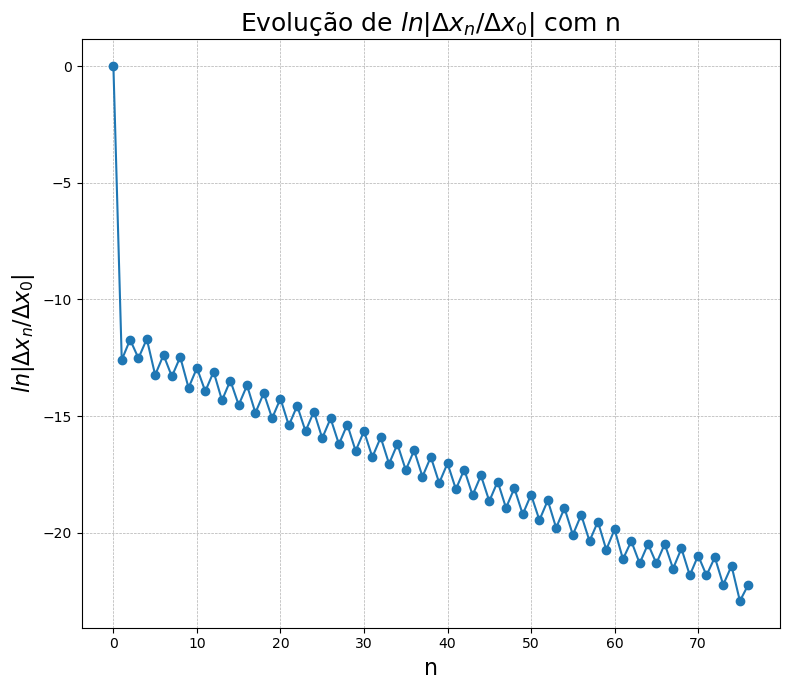

In [308]:
plt.figure(figsize=(8, 7))
plt.plot(range(len(lndelta_x)), lndelta_x, marker="o", linestyle="-")
plt.xlabel("n", fontsize=16)
plt.ylabel(r"$ln|\Delta x_n/\Delta x_0|$", fontsize=16)
plt.title("Evolução de $ln|\Delta x_n/\Delta x_0|$ com n", fontsize=18)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.savefig("/home/velho/Desktop/Codes/Introduction-To-Computational-Physics/NotebooksListas/evlndx085.png", format="png")

In [235]:
def lyapunov_naive(r, x0=0.5, dx=1e-6, n=200):
    """Calcula o expoente de Lyapunov usando a forma igênua
    """
    x01 = x0
    x02 = x0 + dx
    tr1 = iterate_map(
        x01, r, iterations=250
    )  # Iteração mapa logístico para a primeira condição inicial
    tr2 = iterate_map(
        x02, r, iterations=250
    )  # Iteração mapa logístico para a segunda condição inicial

    # Calcula o ln da diferença absoluta entre as duas trajetórias
    lndelta_x = [np.log(np.abs((tr1[i] - tr2[i]) / dx)) for i in range(len(tr1))]
    return np.mean(lndelta_x)

In [270]:
print(lyapunov_naive(0.91))
print(lyapunov_naive(0.97))
print(lyapunov_naive(1.0))

7.034282897184102
9.515183677733807
11.501308858137868


In [272]:
print(lyapunov_naive(0.91, x0=0.51))
print(lyapunov_naive(0.97, x0=0.51))
print(lyapunov_naive(1.0, x0=0.51))

9.983021009684512
11.60454072824578
11.941359690420695


In [274]:
print(lyapunov_naive(0.91, dx=1e-6 + 0.1))
print(lyapunov_naive(0.97, dx=1e-6 + 0.1))
print(lyapunov_naive(1.0, dx=1e-6 + 0.1))

-0.25493737632986047
0.9182278813228684
0.9508552032224967


In [284]:
def logistic_map_derivative(x, r):
    """
    Derivada do mapa logístico: f'(x) = 4 * r * (1 - 2 * x).
    """
    return 4 * r * (1 - 2 * x)
def lyapunov_exponent(r, x0=0.5, discard=1000, n_iter=10**5):
    """
    Calcula o expoente de Lyapunov para um dado valor de r.
    
    Parâmetros:
    - r: Parâmetro de controle do mapa logístico.
    - x0: Condição inicial de x.
    - discard: Número de iterações a serem descartadas no início.
    - n_iter: Número de iterações para o cálculo do expoente de Lyapunov.
    """
    x = x0
    lyapunov_sum = 0

    # Descartar as primeiras 'discard' iterações
    for _ in range(discard):
        x = logistic_map(x, r)
    
    # Calcular o expoente de Lyapunov
    for _ in range(n_iter):
        x = logistic_map(x, r)
        lyapunov_sum += np.log(abs(logistic_map_derivative(x, r)))
    
    return lyapunov_sum / n_iter

In [286]:
# Definindo os valores de r no intervalo [0.7, 1.0]
r_values = np.arange(0.76, 1.0, 0.01)
lambda_values = []

# Calculando o expoente de Lyapunov para cada valor de r
for r in r_values:
    lambda_r = lyapunov_exponent(r)
    lambda_values.append(lambda_r)

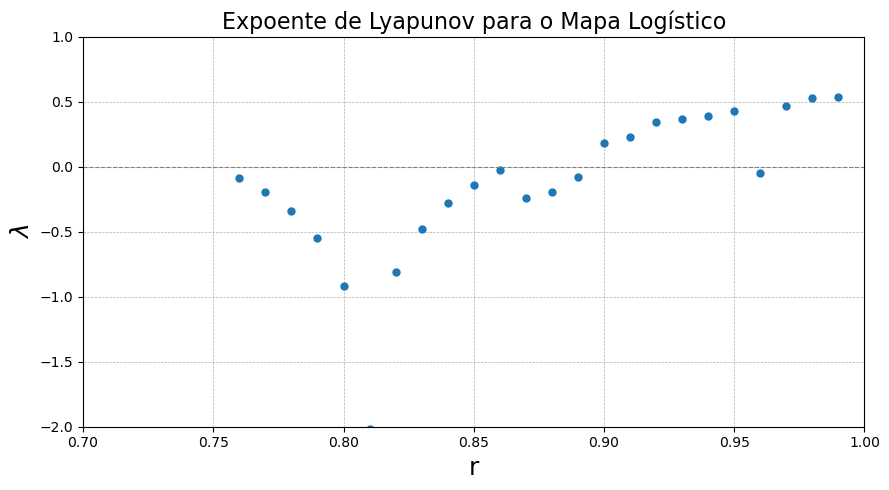

In [295]:
plt.figure(figsize=(9, 5))
plt.plot(r_values, lambda_values, '.', markersize=10)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Linha em λ = 0
plt.xlabel('r', fontsize=18)
plt.ylabel(r'$\lambda$', fontsize=18)
plt.title('Expoente de Lyapunov para o Mapa Logístico', fontsize=16)
plt.xlim(0.7, 1.0)
plt.ylim(-2.0, 1.0)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.savefig("/home/velho/Desktop/Codes/Introduction-To-Computational-Physics/NotebooksListas/lyapunovexp.png", format="png")